# Assignment 1: Classifying handwritten digits using probability theory

# 1. Introduce the problem in your own words. You should mention what data we use, what we want to do with it and how we will do it. Explain with your own words the Naive Bayes classifier, it's assumptions and how this can classify the digits $0-9$.

We want to classify handwritten digtigs, using probability theory. We have a MNIST dataset, containing 70,000 images, and the data is represented as a 784-dimensional vector, where each dimension represents a pixel. We will use the Naive Bayes classifier to classify the digits $0-9$.

Naive Bayes classifier is a probabilistic classifier based on Bayes' theorem with the assumption of independence between all variables. The classifier will classify the digits $0-9$ by calculating the posterior probability of each class given the input vector. The posterior probability is calculated by multiplying the prior probability of the class with the likelihood of the input vector given the class. The prior probability is calculated by dividing the number of training samples of the class by the total number of training samples. The likelihood is calculated by multiplying the probability of each feature given the class.



In [1]:
from __future__ import division
import numpy as np
import pylab as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.metrics import plot_confusion_matrix


# 2. Load the data

In [2]:
# load data
data = np.load("mnist_bin.npz") # insert your answer here

# get vector representation of binary digits
X = data['X']

# get binary labels
y = data['y']

print('The shape of X is (%d, %d)' % X.shape)
print('The shape of y is (%d)\n' % y.shape)

# Dimensions
N, D = X.shape

print('Number of images: %d' % N)
print('Number of pixels: %d' % D)

The shape of X is (70000, 784)
The shape of y is (70000)

Number of images: 70000
Number of pixels: 784


#### Run the code beneath. It plots 10 images of each digit. 


In [3]:
def show_image(x, title="", clim=None, cmap=plt.cm.gray, colorbar=False):
    ax = plt.gca()
    im = ax.imshow(x.reshape((28, 28)), cmap=cmap, clim=clim)
    
    if len(title) > 0:
        plt.title(title)
        
    plt.axis('off')
    
    if colorbar:
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(im, cax=cax)

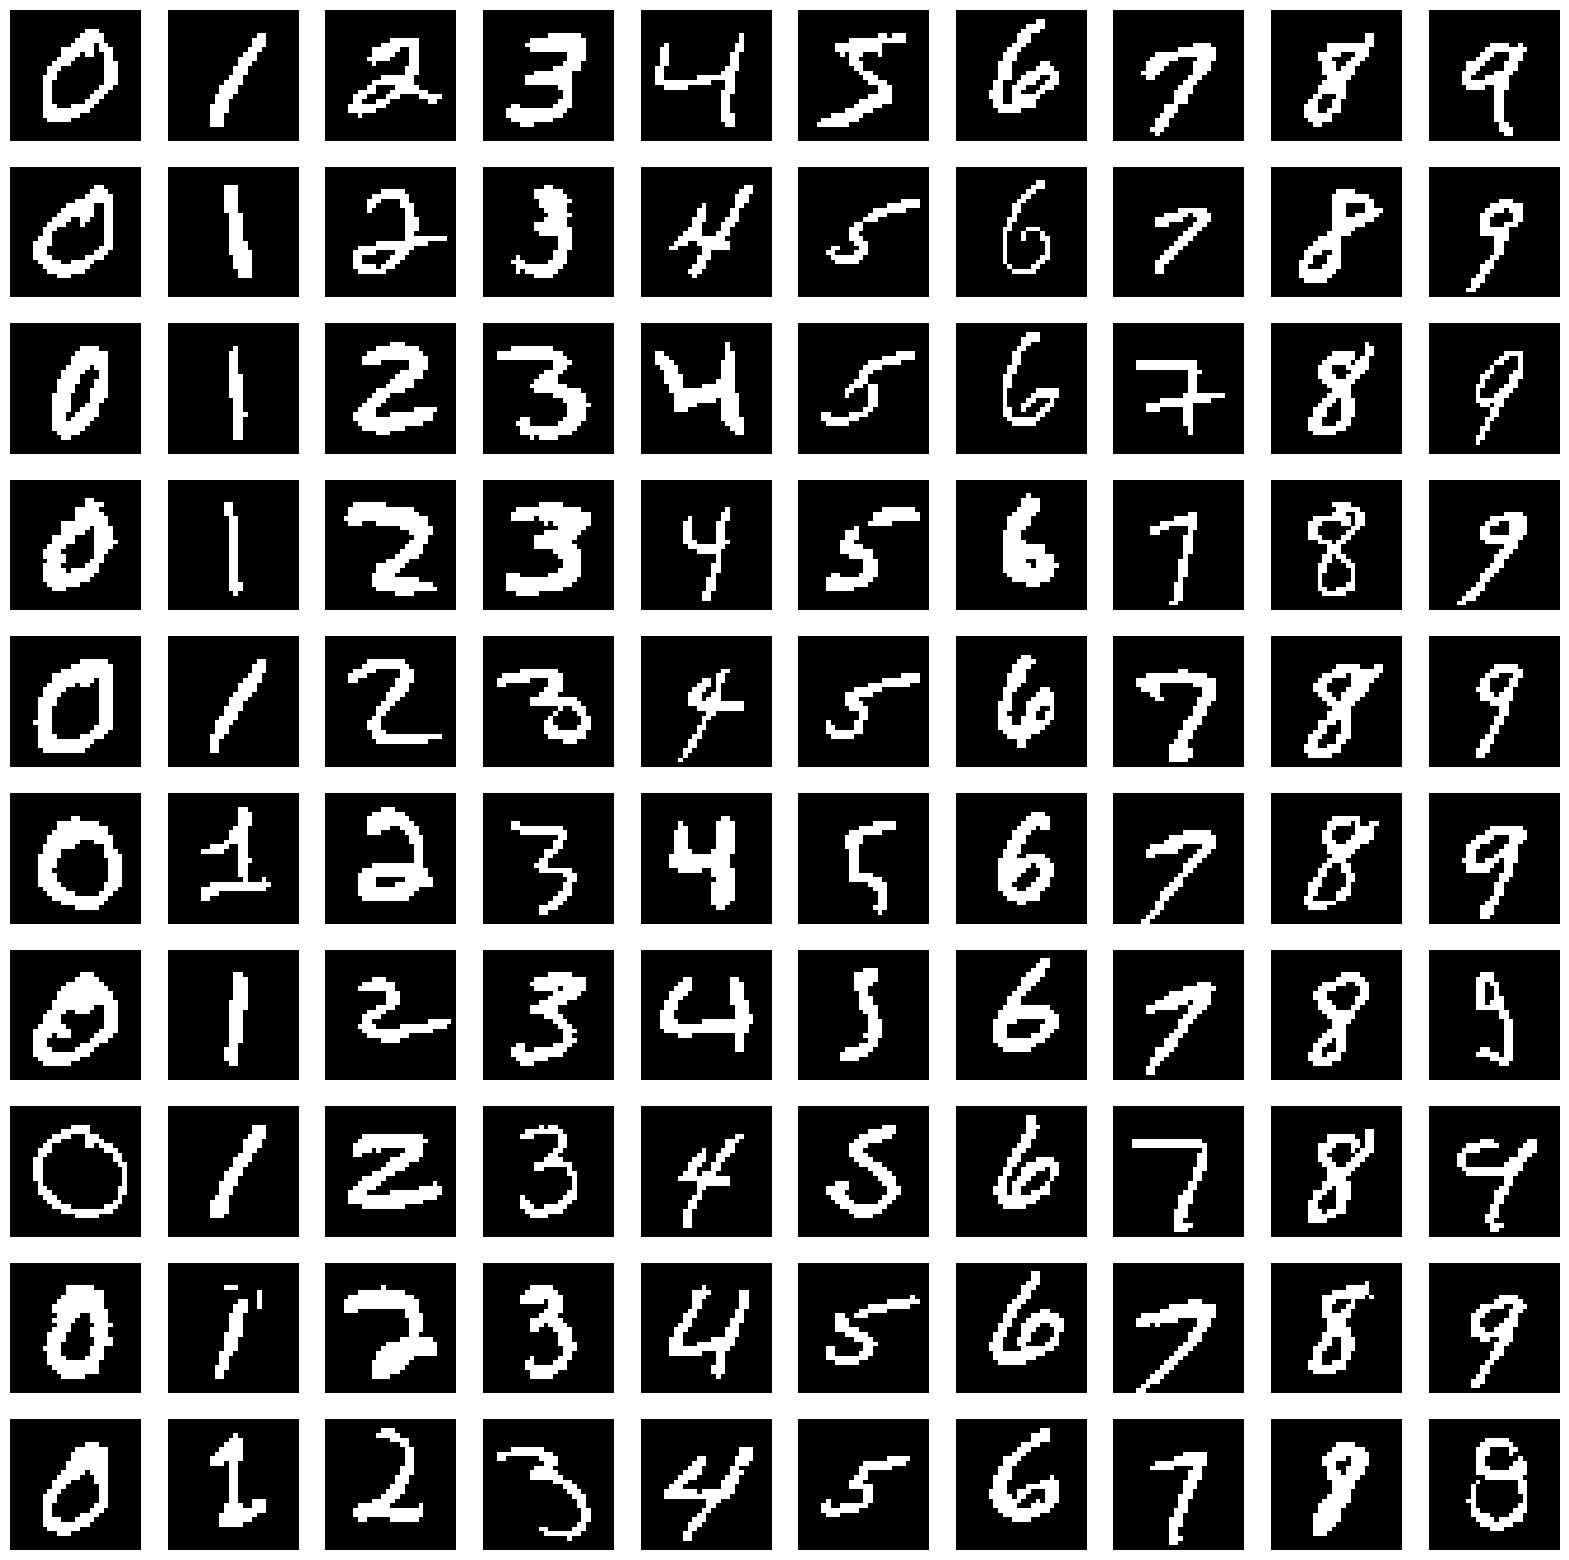

In [4]:
num_images_per_row  = 10
num_labels          = 10

plt.figure(figsize=(20, 20))
counter             = 1
for i in range(num_labels):
    for l in range(num_images_per_row):
        plt.subplot(num_labels, num_images_per_row, counter)

        all_images_belonging_to_class_l = X[y==l,:]
        one_images_belonging_to_class_l = all_images_belonging_to_class_l[i]
        
        show_image(one_images_belonging_to_class_l)  
        counter += 1



# 3. Explain what a training set is, what a test set is and why we as data scientists *always* split data into test/train before doing any modelling. What do we want to avoid?

Training set is a set of data used to train a model. We want to avoid overfitting the model to the training set, so we need to test the model on a test set. Which is why it is split into these two sets.

Test set is is the dataset we use to test the model after we trained it on the training set. In that way we can see how well the model performs on data it has not seen before.

It is all with the purpose of avoiding overfitting the model to the training set, and get the best possible model for unseen data.


In [5]:
N = len(X) # number of images which is 70000
N_train = 50000
N_test = N - N_train

# set random seed:
np.random.seed(0) # don't change this :-)

# create a random permutation for splitting into training and test
randperm = np.random.permutation(N)

# split into training and test
train_idx = randperm[:N_train]
test_idx = randperm[N_train:]
Xtrain, Xtest = X[train_idx, :], X[test_idx, :]
ytrain, ytest = y[train_idx], y[test_idx]

print('Total number of images:\t\t%d' % N)
print('Number of training images:\t%d' % N_train)
print('Number of test images:\t\t%d' % N_test)

Total number of images:		70000
Number of training images:	50000
Number of test images:		20000


# 4. Implement/change the code to handle all digits. 
### Fitting the Naı̈ve-Bayes model to training set: the prior

The code beneath is taken from Exercise 1 and it only handles digits 0 and 1. Change the code to handle all digits.

In [6]:
# count the number of zeros and ones, AND twos, threes, etc.
count_zeros = np.sum(ytrain == 0)
count_ones = np.sum(ytrain == 1)
count_twos = np.sum(ytrain == 2)
count_threes = np.sum(ytrain == 3)
count_fours = np.sum(ytrain == 4)
count_fives = np.sum(ytrain == 5)
count_sixes = np.sum(ytrain == 6)
count_sevens = np.sum(ytrain == 7)
count_eights = np.sum(ytrain == 8)
count_nines = np.sum(ytrain == 9)

# compute prior prob.: P(Y=0) = count_zeros/N_train and P(Y=1) = count_ones/N_train
prob_zeros = count_zeros/N_train
prob_ones = count_ones/N_train
prob_twos = count_twos/N_train
prob_threes = count_threes/N_train
prob_fours = count_fours/N_train
prob_fives = count_fives/N_train
prob_sixes = count_sixes/N_train
prob_sevens = count_sevens/N_train
prob_eights = count_eights/N_train
prob_nines = count_nines/N_train
# write some more code here

# let's store all probabilities in a vector
prior = [prob_zeros, prob_ones, prob_twos, prob_threes, prob_fours, prob_fives, prob_sixes, prob_sevens, prob_eights, prob_nines] # change some code here

# extend the code beneath to print the priors for all digits
print('Number of training digits:\t%d' % N_train)
print('Number of zeros:\t\t%d' % count_zeros)
print('Number of ones:\t\t\t%d' % count_ones)
print('Number of twos:\t\t\t%d' % count_twos)
print('Number of threes:\t\t%d' % count_threes)
print('Number of fours:\t\t%d' % count_fours)
print('Number of fives:\t\t%d' % count_fives)
print('Number of sixes:\t\t%d' % count_sixes)
print('Number of sevens:\t\t%d' % count_sevens)
print('Number of eights:\t\t%d' % count_eights)
print('Number of nines:\t\t%d' % count_nines)


print('Prior probability of seeing a zero:\tp(Y = 0)  = %d/%d = %3.2f' % (count_zeros, N_train, prob_zeros))
print('Prior probability of seeing a one:\tp(Y = 1)  = %d/%d = %3.2f' % (count_ones, N_train, prob_ones))
print('Prior probability of seeing a two:\tp(Y = 2)  = %d/%d = %3.2f' % (count_twos, N_train, prob_twos))
print('Prior probability of seeing a three:\tp(Y = 3)  = %d/%d = %3.2f' % (count_threes, N_train, prob_threes))
print('Prior probability of seeing a four:\tp(Y = 4)  = %d/%d = %3.2f' % (count_fours, N_train, prob_fours))
print('Prior probability of seeing a five:\tp(Y = 5)  = %d/%d = %3.2f' % (count_fives, N_train, prob_fives))
print('Prior probability of seeing a six:\tp(Y = 6)  = %d/%d = %3.2f' % (count_sixes, N_train, prob_sixes))
print('Prior probability of seeing a seven:\tp(Y = 7)  = %d/%d = %3.2f' % (count_sevens, N_train, prob_sevens))
print('Prior probability of seeing a eight:\tp(Y = 8)  = %d/%d = %3.2f' % (count_eights, N_train, prob_eights))
print('Prior probability of seeing a nine:\tp(Y = 9)  = %d/%d = %3.2f' % (count_nines, N_train, prob_nines))

Number of training digits:	50000
Number of zeros:		5009
Number of ones:			5647
Number of twos:			5002
Number of threes:		5090
Number of fours:		4868
Number of fives:		4489
Number of sixes:		4894
Number of sevens:		5164
Number of eights:		4846
Number of nines:		4991
Prior probability of seeing a zero:	p(Y = 0)  = 5009/50000 = 0.10
Prior probability of seeing a one:	p(Y = 1)  = 5647/50000 = 0.11
Prior probability of seeing a two:	p(Y = 2)  = 5002/50000 = 0.10
Prior probability of seeing a three:	p(Y = 3)  = 5090/50000 = 0.10
Prior probability of seeing a four:	p(Y = 4)  = 4868/50000 = 0.10
Prior probability of seeing a five:	p(Y = 5)  = 4489/50000 = 0.09
Prior probability of seeing a six:	p(Y = 6)  = 4894/50000 = 0.10
Prior probability of seeing a seven:	p(Y = 7)  = 5164/50000 = 0.10
Prior probability of seeing a eight:	p(Y = 8)  = 4846/50000 = 0.10
Prior probability of seeing a nine:	p(Y = 9)  = 4991/50000 = 0.10


### Fitting the Naı̈ve-Bayes model to training set: the likelihood

In [9]:
Xtrain_zeros = Xtrain[ytrain == 0, :]
Xtrain_ones = Xtrain[ytrain == 1, :]
Xtrain_twos = Xtrain[ytrain == 2, :]
Xtrain_threes = Xtrain[ytrain == 3, :]
Xtrain_fours = Xtrain[ytrain == 4, :]
Xtrain_fives = Xtrain[ytrain == 5, :]
Xtrain_sixes = Xtrain[ytrain == 6, :]
Xtrain_sevens = Xtrain[ytrain == 7, :]
Xtrain_eights = Xtrain[ytrain == 8, :]
Xtrain_nines = Xtrain[ytrain == 9, :]

# fit model for zeros and ones separately as well as for all digits
p_zeros = np.mean(Xtrain_zeros, axis=0)    # p(X_i = 1| Y = 0)
p_ones = np.mean(Xtrain_ones, axis=0)      # p(X_i = 1| Y = 1)
p_twos = np.mean(Xtrain_twos, axis=0)      # p(X_i = 1| Y = 2)
p_threes = np.mean(Xtrain_threes, axis=0)  # p(X_i = 1| Y = 3)
p_fours = np.mean(Xtrain_fours, axis=0)    # p(X_i = 1| Y = 4)
p_fives = np.mean(Xtrain_fives, axis=0)    # p(X_i = 1| Y = 5)
p_sixes = np.mean(Xtrain_sixes, axis=0)    # p(X_i = 1| Y = 6)
p_sevens = np.mean(Xtrain_sevens, axis=0)  # p(X_i = 1| Y = 7)
p_eights = np.mean(Xtrain_eights, axis=0)  # p(X_i = 1| Y = 8)
p_nines = np.mean(Xtrain_nines, axis=0)    # p(X_i = 1| Y = 9)

In [13]:
# This code should be sufficient, i.e. don't change this.

# define p-digtit as the probability of each digit

p_digits = [p_zeros, p_ones, p_twos, p_threes, p_fours, p_fives, p_sixes, p_sevens, p_eights, p_nines]

def log_likelihood(x_new, p_digit):
    pixel_log_lik = x_new*np.log(p_digit + 1e-16) + (1-x_new)*np.log(1-p_digit)
    return np.sum(pixel_log_lik)
    
image_idxs_to_be_classified = [0,10,510,810]
for image_idx in image_idxs_to_be_classified:
    x_new = Xtrain[image_idx]
    print('Image idx: %d (label=%d)' % (image_idx, ytrain[image_idx]))
    
    for i in range(10):
        print('p(x_new | Y=%d): %3.2e' % (i ,np.exp(log_likelihood(x_new, p_digits[i])))) # p-digtit is the probability of the digit
    print('\n')

Image idx: 0 (label=0)
p(x_new | Y=0): 1.34e-85
p(x_new | Y=1): 8.79e-243
p(x_new | Y=2): 4.20e-119
p(x_new | Y=3): 6.82e-123
p(x_new | Y=4): 1.37e-118
p(x_new | Y=5): 2.02e-109
p(x_new | Y=6): 6.67e-99
p(x_new | Y=7): 7.67e-188
p(x_new | Y=8): 1.30e-109
p(x_new | Y=9): 1.81e-134


Image idx: 10 (label=1)
p(x_new | Y=0): 3.34e-122
p(x_new | Y=1): 2.56e-34
p(x_new | Y=2): 4.35e-75
p(x_new | Y=3): 1.13e-76
p(x_new | Y=4): 3.38e-86
p(x_new | Y=5): 2.75e-76
p(x_new | Y=6): 8.00e-113
p(x_new | Y=7): 6.53e-84
p(x_new | Y=8): 8.71e-68
p(x_new | Y=9): 7.85e-81


Image idx: 510 (label=1)
p(x_new | Y=0): 2.37e-125
p(x_new | Y=1): 4.29e-34
p(x_new | Y=2): 2.61e-73
p(x_new | Y=3): 1.21e-78
p(x_new | Y=4): 9.63e-96
p(x_new | Y=5): 9.85e-78
p(x_new | Y=6): 1.96e-88
p(x_new | Y=7): 1.80e-107
p(x_new | Y=8): 9.27e-68
p(x_new | Y=9): 9.43e-90


Image idx: 810 (label=6)
p(x_new | Y=0): 8.09e-151
p(x_new | Y=1): 1.51e-149
p(x_new | Y=2): 5.33e-102
p(x_new | Y=3): 2.03e-128
p(x_new | Y=4): 5.72e-108
p(x_n

### Implementing Bayes's theorem

In [20]:
def compute_posterior_prob(x_new):
    log_like_zeroes = log_likelihood(x_new, p_zeros)
    log_like_ones = log_likelihood(x_new, p_ones)
    log_like_twos = log_likelihood(x_new, p_twos)
    log_like_threes = log_likelihood(x_new, p_threes)
    log_like_fours = log_likelihood(x_new, p_fours)
    log_like_fives = log_likelihood(x_new, p_fives)
    log_like_sixes = log_likelihood(x_new, p_sixes)
    log_like_sevens = log_likelihood(x_new, p_sevens)
    log_like_eights = log_likelihood(x_new, p_eights)
    log_like_nines = log_likelihood(x_new, p_nines)

    # exponentiate
    like_zeroes = np.exp(log_like_zeroes)
    like_ones = np.exp(log_like_ones)
    like_twos = np.exp(log_like_twos)
    like_threes = np.exp(log_like_threes)
    like_fours = np.exp(log_like_fours)
    like_fives = np.exp(log_like_fives)
    like_sixes = np.exp(log_like_sixes)
    like_sevens = np.exp(log_like_sevens)
    like_eights = np.exp(log_like_eights)
    like_nines = np.exp(log_like_nines)

    # implement eq. (4)
    term_zeroes = like_zeroes*prior[0]
    term_ones = like_ones*prior[1]
    term_twos = like_twos*prior[2]
    term_threes = like_threes*prior[3]
    term_fours = like_fours*prior[4]
    term_fives = like_fives*prior[5]
    term_sixes = like_sixes*prior[6]
    term_sevens = like_sevens*prior[7]
    term_eights = like_eights*prior[8]
    term_nines = like_nines*prior[9]

    # calculating the evidence
    evidence = term_zeroes + term_ones + term_twos + term_threes + term_fours + term_fives + term_sixes + term_sevens + term_eights + term_nines

    # insert your code here to return a vector of length 10 containing the posterior probability
    # of belonging to each class
    post_prob_zeroes = term_zeroes / evidence
    post_prob_ones = term_ones / evidence
    post_prob_twos = term_twos / evidence
    post_prob_threes = term_threes / evidence
    post_prob_fours = term_fours / evidence
    post_prob_fives = term_fives / evidence
    post_prob_sixes = term_sixes / evidence
    post_prob_sevens = term_sevens / evidence
    post_prob_eights = term_eights / evidence
    post_prob_nines = term_nines / evidence

    # Collect all probabilities into a vector
    posterior = np.array([post_prob_zeroes,\
                          post_prob_ones,\
                          post_prob_twos,\
                          post_prob_threes,\
                          post_prob_fours,\
                          post_prob_fives,\
                          post_prob_sixes,\
                          post_prob_sevens,\
                          post_prob_eights,\
                          post_prob_nines])

    return posterior

### A simple classification rule: take the class with largest posterior probability

In [21]:
def classify(x):
    posterior = compute_posterior_prob(x)
    predicted_label = np.argmax(posterior)
    return predicted_label
    

### Change this code to classify some images

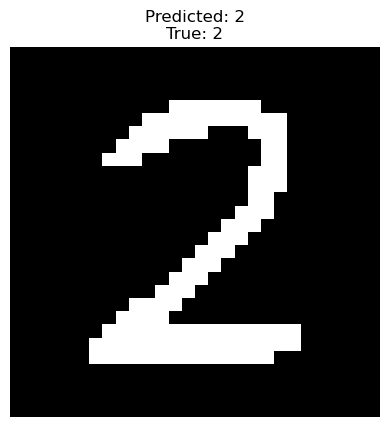

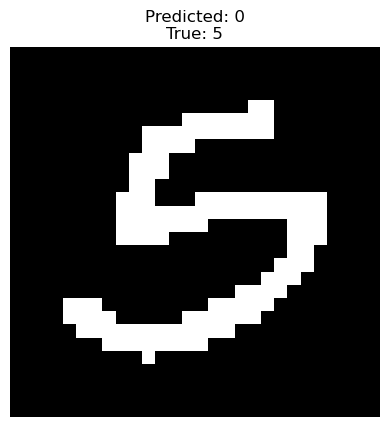

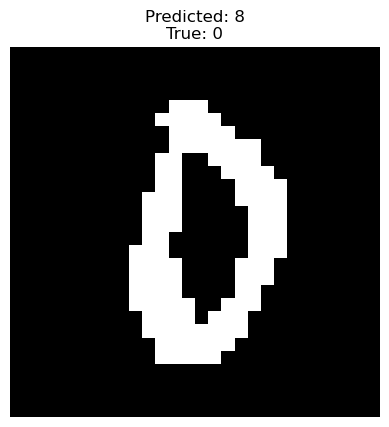

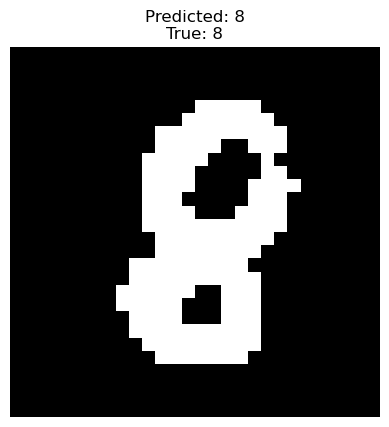

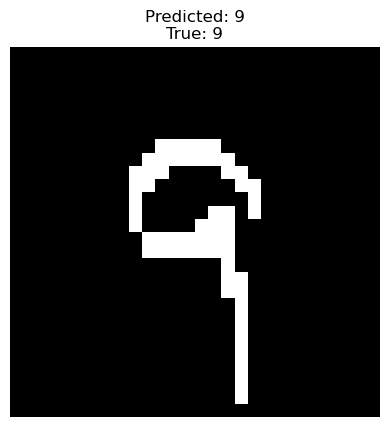

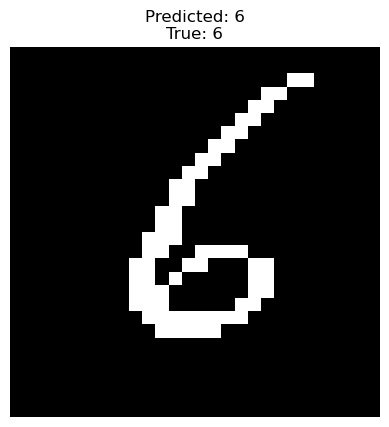

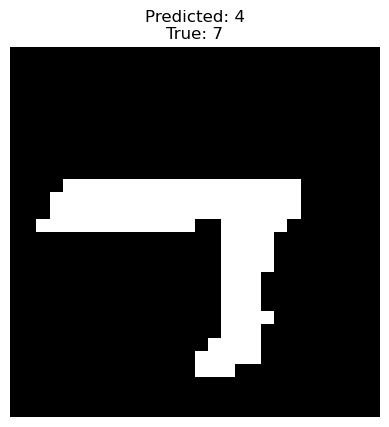

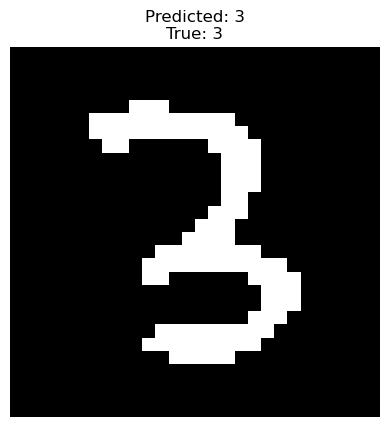

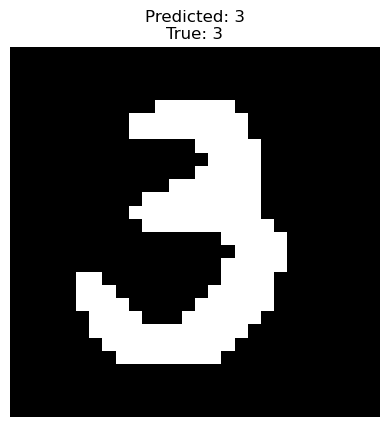

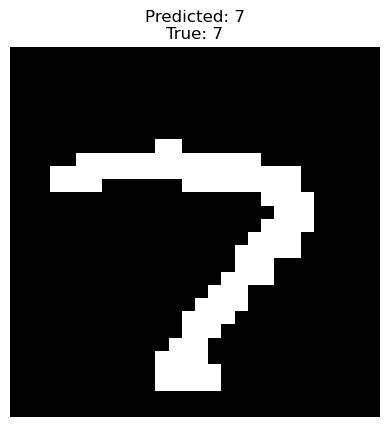

In [28]:
# Classifies the first 10 images in the test set
for i in range(10):
    f = plt.figure()
    plt.imshow(Xtest[i, :].reshape(28, 28), cmap='gray', interpolation='nearest')
    predicted_label = classify(Xtest[i, :])
    plt.title("Predicted: %d\nTrue: %d" % (predicted_label, ytest[i]))


    # compute posterior probabilities
    posterior = compute_posterior_prob(Xtest[i, :])
    
    # get true label and predicted label
    true_label = ytest[i]
    predicted_label = classify(Xtest[i, :])
    
    # show image 
    show_image(Xtest[i, :])
    


### Let's compute the training and test errors

In [29]:
ytrain_hat = np.array([classify(x) for x in Xtrain])
ytest_hat = np.array([classify(x) for x in Xtest])

In [30]:
mean_train_acc = np.mean(ytrain_hat == ytrain)
mean_test_acc = np.mean(ytest_hat == ytest)
print('Training accuracy:\t%4.3f' % mean_train_acc)
print('Test accuracy:\t\t%4.3f' % mean_test_acc)

Training accuracy:	0.841
Test accuracy:		0.839


# 5. Compute the confusion matrix and explain what it shows.

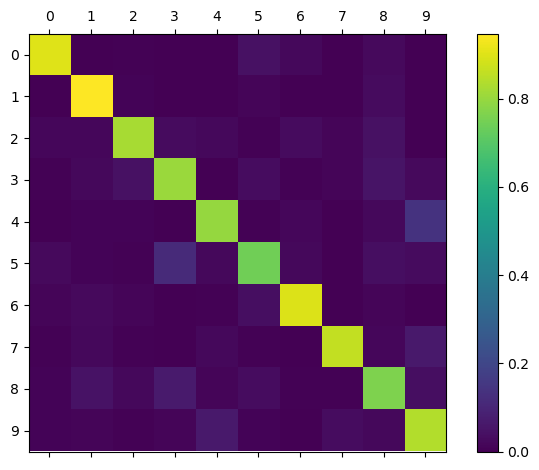

In [31]:
from sklearn.metrics import confusion_matrix
labels = list(range(10))
pred = np.array([classify(x) for x in Xtest])
cm = confusion_matrix(y_true=ytest, y_pred=pred, labels=labels,normalize="true")
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
fig.colorbar(cax)
ax.set_xticks(labels)
ax.set_yticks(labels)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.tight_layout()
plt.show()

This confusion matrix shows the number of times the model predicted a certain digit, and the actual digot was another digit. For example, the model predicted digit 4, but the actual digit was 7, seen from the previous code. 

This confusion matrix shows that our model is good at predicting the digit 1, but when it was wrong it guessed 8 for the most part. Furthermore, it appears that our model was worst at guessing the digit 5. 

# 6. Error analysis: find images that are misclassified by the system.  Are there common characteristics among the images that are misclassified?

The digtis 9 and 4 are more often misclassified than the other digits. The digit 9 is often misclassified as 4, and the digit 4 is often misclassified as 9. This is probably because the digits 9 and 4 are very similar, and the model is not as able to distinguish between them. 

